## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Data was gathered from the Twitter Archive of @We_rate_Dogs 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1823  676533798876651520                    NaN                  NaN   
1879  675015141583413248                    NaN                  NaN   
1690  681339448655802368                    NaN                  NaN   
1031  745422732645535745                    NaN                  NaN   
1868  675166823650848770                    NaN                  NaN   

                      timestamp  \
1823  2015-12-14 22:46:41 +0000   
1879  2015-12-10 18:12:05 +0000   
1690  2015-12-28 05:02:37 +0000   
1031  2016-06-22 01:06:43 +0000   
1868  2015-12-11 04:14:49 +0000   

                                                 source  \
1823  <a href="http://twitter.com/download/iphone" r...   
1879  <a href="http://twitter.com/download/iphone" r...   
1690  <a href="http://twitter.com/download/iphone" r...   
1031  <a href="http://twitter.com/download/iphone" r...   
1868  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1823      ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ                  NaN   
1879  Meet Moe. He's a golden Fetty Woof. Doesn't re...                  NaN   
1690  This is Asher. He's not wearing a seatbelt or ...                  NaN   
1031  We only rate dogs. Pls stop sending in non-can...                  NaN   
1868  This is Arnold. He broke his leg saving a hand...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1823                       NaN                        NaN   
1879                       NaN                        NaN   
1690                       NaN                        NaN   
1031                       NaN                        NaN   
1868                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1823  https://twitter.com/dog_rates/status/676533798...                12   
1879  https://twitter.com/dog_rates/status/675015141...                10   
1690  https://twitter.com/dog_rates/status/681339448...                 9   
1031  https://twitter.com/dog_rates/status/745422732...                 9   
1868  https://twitter.com/dog_rates/status/675166823...                10   

      rating_denominator    name doggo floofer pupper puppo  
1823                  10    None  None    None   None  None  
1879                  10     Moe  None    None   None  None  
1690                  10   Asher  None    None   None  None  
1031                  10    very  None    None   None  None  
1868                  10  Arnold  None    None   None  None

Fig. 1.1 The data gathered from the Twitter archive of @We_rate_dogs page displaying 5 random rows

### Insights:
1. Among the stages(doggo, puppo, pupper, and floofer), which has the highest entries?

2. What is the correlation between retweet count and favorite count of the dogs images posted on twitter? 

3. From the numerator, which number has the highest entry?

### Gather

I imported all the libraries I needed, downloaded the **twitter_archive** dataset from the classroom and read it into the notebook. Furthermore, I scraped data from the website url given using the **Requests** library to get the tweet_image predictions **(image_predictions.tsv)** dataset and read it into the notebook. Finally, I created a **twitter developer account** which I used to generate (API Key and the Access Key) to query additional data from Twitter API using **Tweepy**. The data thus gotten came in **json** file from which I created a **pandas DataFrame** and read into the notebook.

### Assessment

Using both the **Visual** and the **Programatic** assesssments, I found these **Quality** and **Tidiness** issues:

#### Quality issues

1. There were **Missing** values in the **twitter_archive** dataframe (**in_reply_to_status**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, and **retweeted_status_time_stamp**).

2. **Time stamp data type** in **twitter_archive** dataframe was **object** instead of **date_time**. 

3. Since we are not computing **p1_conf, p2_conf, and p3_conf** in **image_predictions** datafrmae, their data types should be **object**, not **float**. 

4. **Nulls** were represented as **None** in the **stages** columns.

5. **Nulls** were represented as **None** in the **name** column of the **twitter_archieve** dataframe.

6. Some values of the **rating denominator** in the **twitter_archive** dataframe are **inconsistent**. That is, some of them are greater than 10 while one is 0.

7. Some **names** in the **twitter_archive** dataframe are simply "a", "the", etc, which are not actual names but part of text in the name column.

8. The retweet_count, favorite_count, and stage columns were missing in the clean_twittwer_archive dataframe.

9. The twitter_archive dataframe containained retweeted tweets.

10. Some of the **stage** columns in the clean_twitter_archive dataframe contained more than one value (for instance, 'doggo,floofer', 'doggo,pupper', 'doggo,puppo').


#### Tidiness issues
1. The **tweet_id** column in **twitter_archive** dataframe was duplicated in **image_predictions** and **tweet** dataframes.  

2. The **doggo**, **floofer**, **pupper**, and **puppo** columns in the twitter_archive dataframe are redundant, they should be combined as a single column **'Stage'**.

3. **Retweet count** and **favorite count** in the **tweet** dataframe should be part of **twitter archive**.

### Cleaning

Before cleaning, I copied all the three datasets using the copy() function. Then I:

1. **Masked the twitter_archive table to remove all rows which had retweet_id.**

2. **Dropped the columns with missing values in the  twitter_archive dataframe (in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_time_stamp) using pd.drop_null() function**

3. **Replaced the None values with Numpy's np.nan in the (doggo, puppo, pupper, and floofer) columns**

4. **Used the pandas stack and groupby function and merged the columns (doggo, floofer, pupper, and puppo) to 'Stage' and created a new column called *stage*, then I dropped the (doggo, puppo, pupper, and floofer) columns**

5. **Having found out that doggo,floffer were actally floffer, I used the replace function to replace the 'doggo,floofer' with floofer. Also, I replaced the ('doggo,pupper' and 'doggo,puppo') with np.nan since it was not stated in the text column that they are doggo or pupper)**

6. **Replaced some names in the name column which are "a, the, such, an, this" etc with np.nan and then drooped the name column**

7. **Merged the retweet_count and favorite_count columns to the tweet dataframe, joining on tweet_id, and dropped all the missing rows on the twitter_archive dataframe**

8. **Using the loop function, I looped through the clean_twitter_archive rating_denominator column then I used pandas replace function to replace those values that were greater than and less than 10 with 10**

9. **Using the pandas to_datetime() module, I converted the time_stamp data type to datetime**.

10. **Subset the image_prediction dataframe using the p1_dog == True, to get the images that are dogs. Since the p1_dog is the algorithm's number one prediction and has the most accurate prediction**

In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id            timestamp  \
0  890240255349198849  2017-07-26 15:59:51   
1  889665388333682689  2017-07-25 01:55:32   
2  889531135344209921  2017-07-24 17:02:04   
3  886366144734445568  2017-07-15 23:25:31   
4  884162670584377345  2017-07-09 21:29:42   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Cassie. She is a college pup. Studying...                14   
1  Here's a puppo that seems to be on the fence a...                13   
2  This is Stuart. He's sporting his favorite fan...                13   
3  This is Roscoe. Another pupper fallen victim t...                12   
4  Meet Yogi. He doesn't have any important dog m...                12   

   rating_denominator   stage  favorite_count  retweet_count  
0                  10   doggo         27823.0         6060.0  
1                  10   puppo         41828.0         8294.0  
2                  10   puppo         13295.0         1873.0  
3                  10  pupper         18458.0         2610.0  
4                  10   doggo         17863.0         2493.0

Fig. 1.2 Cleaned Twitter Archive data. Showing the first 5 rows

* To determine which of the dog stages has the highest entries, I used the value_counts method on the cleaned master dataFrame to dsiplay the value counts of the stages. This was only possible after cleaning.

* To determine the correlation between retweet count and favorite count of the dogs images posted on twitter, I checked the correlation between the favorit_count and the retweet_count olumns of the data and got the answer to be **0.95011372952098183**

* To determine the numerator which number has the highest entry,  I used a bar plot for the rating_numerator column and found  out that the numbers 10 - 13 had the highest rating_numerator above 70. The figure below show the bar plot of the rating_numerator 


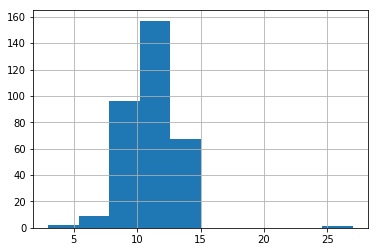

In [3]:
twitter_archive_master['rating_numerator'].hist()

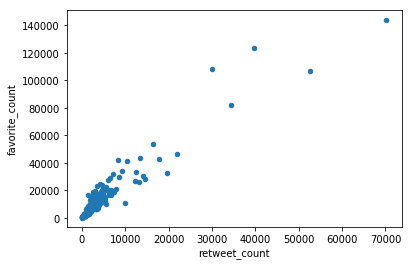

In [4]:
twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.show()